In [1]:
# Assigment 5
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr
def kalman_filt(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr, P, K

def kalman_filt_x(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr
def extrapol(x, m, F):
    return (np.linalg.matrix_power(F, m)).dot(x)
        

In [3]:
# PART 1
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 0.2 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [4]:
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

In [5]:
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

In [6]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

In [7]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

In [8]:
# X_pred = np.zeros([200, 2])
# X_pred[0] = np.array([2, 0])
# P_pred = np.zeros([200, 2, 2])
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
R = sigmaeta_2
X0 = np.array([2, 0])
P0 = np.array([[10000, 0], [0, 10000]])

X_filt, P, K = kalman_filt(z, X0, P0, F, Q, R, H)
# X_filt = np.zeros([200, 2])
# P = np.zeros([200, 2 , 2])
# K = np.zeros([200, 2])

# X_filt[0] = np.array([2, 0])


# P[0] = np.array([[10000, 0], [0, 10000]])

# for i in range(1, len(X)):
#     X_filt[i] = np.dot(F, X_filt[i - 1].reshape(2, 1)).reshape(1, 2)
#     P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q
    
#     K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
    
#     X_filt[i] = X_filt[i] + K[i] * (z[i] - np.dot(H, X_filt[i]))
#     P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])


/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


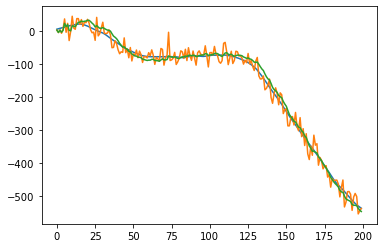

In [9]:
plt.plot(X[:,0])
plt.plot(z)
plt.plot(X_filt[:,0])

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


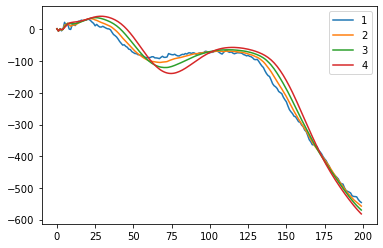

In [10]:
plt.plot(X_filt[:,0])
plt.plot(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0])
plt.plot(kalman_filt_x(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0])
plt.plot(kalman_filt_x(kalman_filt_x(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0])
plt.legend(["1", "2", "3", "4"])

0.13895150388783034

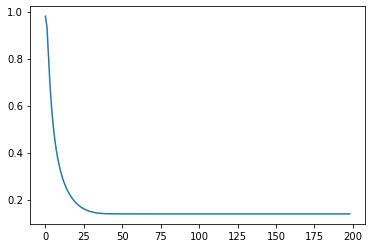

In [11]:
plt.plot(K[1:, 0])
min(K[1:, 0])

55.580601555132134

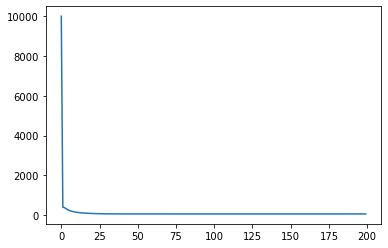

In [12]:
plt.plot(P[:,0,0])
min(P[:,0,0])

In [13]:
m = 7
X_extrapol = np.zeros([200, 2])
for i in range(m - 1,len(X_filt)):
    X_extrapol[i] = extrapol(X_filt[:,:][i - m + 1], m, F)

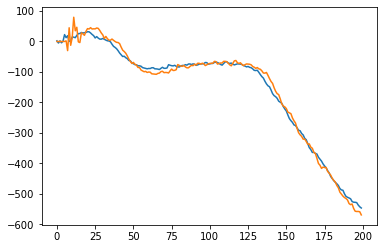

In [14]:
plt.plot(X_filt[:, 0])
plt.plot(X_extrapol[:, 0])

In [19]:
err = np.zeros([500, 197])
xf = X_filt
for i in range(500):
    xf = kalman_filt_x(xf, X0, P0, F, Q, R, H)
    X_extrapol = np.zeros([200, 2])
    for j in range(m - 1,len(X_filt)):
        X_extrapol[j] = extrapol(X_filt[:,:][j - m + 1], m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


In [20]:
final_err = np.zeros(500)
for i in range(500):
    final_err[i] = np.sqrt(np.mean(err[i]))

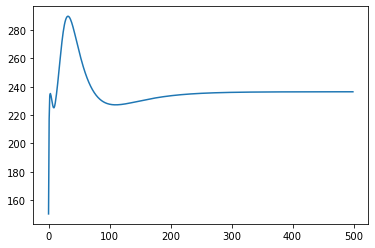

In [34]:
plt.plot(final_err)

In [27]:
np.std(X_filt[:, 0] - z)

19.920328582910287

In [30]:
err = np.zeros([500, 197])
X0 = np.array([2, 0])
P0 = np.array([[100, 0], [0, 100]])
xf = kalman_filt_x(z, X0, P0, F, Q, R, H)
for i in range(500):
    xf = kalman_filt_x(xf, X0, P0, F, Q, R, H)
    X_extrapol = np.zeros([200, 2])
    for j in range(m - 1,len(X_filt)):
        X_extrapol[j] = extrapol(X_filt[:,:][j - m + 1], m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err2 = np.zeros(500)
for i in range(500):
    final_err2[i] = np.sqrt(np.mean(err[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_13804/3481450169.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


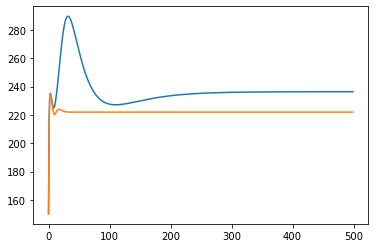

In [32]:
plt.plot(final_err)
plt.plot(final_err2)